In [13]:
# Initial loading of foreign gifts data from data.gov

import pandas as pd

donations_df = pd.read_excel('ForeignGifts.xls', skiprows=1)
# donations_df.loc[:, 'Foreign Gift Amount'] = donations_df.loc[:, 'Foreign Gift Amount'].apply('{:,}'.format)
donations_df

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN
...,...,...,...,...,...,...,...,...,...,...
21047,21048,142600,Yale University,New Haven,CT,2018-08-22,2000000,Monetary Gift,CHINA,Anonymous #14
21048,21049,142600,Yale University,New Haven,CT,2018-12-04,2400000,Monetary Gift,CANADA,Anonymous #40
21049,21050,142600,Yale University,New Haven,CT,2018-04-09,4933450,Monetary Gift,CHINA,Anonymous #11
21050,21051,142600,Yale University,New Haven,CT,2018-04-09,4933450,Monetary Gift,CHINA,Anon. Donor #1


In [14]:
# Pulling top 10 schools recieved the most NUMBER of foreign donations

(donations_df
 .groupby('Institution Name')   # Grouping by unisveristy
 .count()                       # Applying count() to group
 .iloc[:, 0]                    # Only display first column
 .sort_values(ascending=False)  # Sort in decending order
 .head(10))                     # Only show top 10


Institution Name
University of California, Los Angeles          3611
California Institute of Technology             3364
Johns Hopkins University                       1181
Columbia University in the City of New York     828
Ohio State University (The)                     795
University of Michigan - Ann Arbor              702
Stanford University                             659
Harvard University                              564
Massachusetts Institute of Technology           415
University of Colorado Denver                   412
Name: ID, dtype: int64

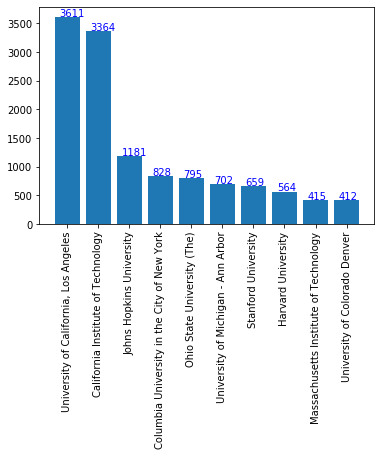

In [16]:
# Generating rough top 10 by count figure

import matplotlib.pyplot as plt

top10_by_counts = (
    donations_df.groupby('Institution Name')
    .count()
    .iloc[:, 0]
    .sort_values(ascending=False)
    .iloc[:10])

fig, ax = plt.subplots()                                 # Begin pyplot area
ax.bar(top10_by_counts.index, top10_by_counts.values)    # Generate basic bar chart
plt.xticks(rotation=90)                                  # Rotate x-axis label for clarity
for i, v in enumerate(top10_by_counts.values):           # Add numeric labels to bars for clarity
    ax.text(i-0.25, v+15, str(v), color='blue')
    
# Note: this is donated contract + cash gifts

In [17]:
# Pulling top 10 schools recieved the highest dollar amount of foreign donations

(donations_df
 .groupby('Institution Name')     # Group by university
 .sum()                           # Apply sum() to all columns
 .loc[:, 'Foreign Gift Amount']   # Only display 'Foresign Gift Amount' columm
 .sort_values(ascending=False)    # Sort in decending
 .head(10))                        # Display top 10 entries only


Institution Name
Carnegie Mellon University               1378003807
Harvard University                       1143899998
Massachusetts Institute of Technology     660830374
Johns Hopkins University                  447459034
Northwestern University                   420550173
Georgetown University                     415622195
University of California, Berkeley        336801721
Duke University                           314693237
Stanford University                       313775195
New York University                       291391003
Name: Foreign Gift Amount, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

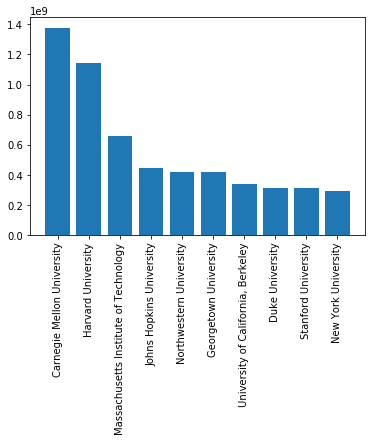

In [22]:
# Generating rough top 10 by $ chart

top10_by_dollars = (donations_df
    .groupby('Institution Name')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .iloc[:10])

fig, ax = plt.subplots()                                  # Initialize pyplot area
ax.bar(top10_by_dollars.index, top10_by_dollars.values)   # Generating bar chart
plt.xticks(rotation=90)                                   # Rotate x-axis label for clarity

# Note: this is donated contract + cash gifts

In [23]:
# Pulling top 10 schools recieved the highest dollar amount of foreign donations, but only including cast donations

(donations_df
 .loc[donations_df['Gift Type']=='Monetary Gift']  # Pullinng all rows that are 'Monetary Gift' only (at 'Gift Type' column)
 .groupby('Institution Name')                      # Group by university
 .sum()                                            # Apply sum() over columns
 .loc[:, 'Foreign Gift Amount']                    # Only display 'Foreign Gift Amount column'
 .sort_values(ascending=False)                     # Sort in descending order
 .head(10))                                        # Display top 10 entries only

# Note: this is for cash gifts only

Institution Name
Harvard University                             729378154
Massachusetts Institute of Technology          582888432
Johns Hopkins University                       447443471
Stanford University                            305730258
Duke University                                242147330
Columbia University in the City of New York    146003397
New York University                            140389153
University of Pennsylvania                     135399121
University of California, Berkeley             132745273
Yale University                                112274698
Name: Foreign Gift Amount, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

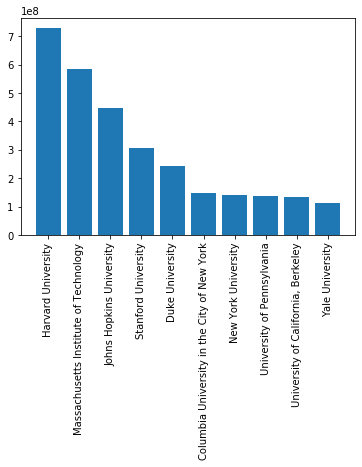

In [7]:
# Generating rough top 10 by $ chart but only cash donations

top10_by_dollars = (donations_df.loc[donations_df['Gift Type']=='Monetary Gift']
 .groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .iloc[:10])

fig, ax = plt.subplots()                                   # Initializing pyplot area
ax.bar(top10_by_dollars.index, top10_by_dollars.values)    # Generating bar chart
plt.xticks(rotation=90)                                    # Rotating x-axis labels for clarity

# Note: this is donated contract + cash gifts

In [8]:
# Loading and cleaning Democracy Index data. Data obtain by scraping table from Wikipedia via MS Excel

labels = [                                    # List of column headings for democracy index data
    'Rank',
    'Country',
    'Score',
    'Electoral process and pluralism',
    'Functioning of government',
    'Political participation',
    'Political culture',
    'Civil liberties',
    'Regine type',
    'Region',
    '','','','','']                          # Empty labels needed because of the shape of the data file
democracy_df = pd.read_excel(
    'democracy_index.xlsx',
    names=labels,                            # Use list generated above for column labels
    skiprows=148)                            # Number of rows to skip determined by brute force trail and error

democracy_df.drop(
    ['', '.1', '.2', '.3', '.4'],            # Dropping empty columns        
    axis=1,
    inplace=True)
democracy_df = democracy_df.iloc[2:310]      # Dropping superfluous columns to the left
democracy_df.loc[:, 'Country'] = (
    democracy_df.loc[:, 'Country']           # There were extra whitespace to the left of the name of countries 
    .str                                     # Accessing string methods
    .strip())                                # Strip white space on both side
democracy_df = (                             
    democracy_df.loc[democracy_df['Country'] # Slicing out all empty rows
    .isnull() == False])                     # Identifying empty rows by empty cells in 'Country' column    
democracy_df.fillna(                         # Fill in missing rankings
    method='ffill',
    inplace=True)
democracy_df.set_index('Country', inplace=True)
democracy_df.rename(                         # Rename the one country name with superscript notes
    index={'South Korea[n 2]': 'South Korea'},
    inplace=True)
democracy_df.head(50)

,Rank,Score,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,Regine type,Region
Country,,,,,,,,,
Norway,1,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,Western Europe
Iceland,2,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,Western Europe
Sweden,3,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,Western Europe
New Zealand,4,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,Asia & Australasia
Finland,5,9.25,10.00,8.93,8.89,8.75,9.71,Full democracy,Western Europe
Ireland,6,9.24,10.00,7.86,8.33,10.00,10.00,Full democracy,Western Europe
Denmark,7,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy,Western Europe
Canada,7,9.22,9.58,9.64,7.78,9.38,9.71,Full democracy,North America
Australia,9,9.09,10.00,8.93,7.78,8.75,10.00,Full democracy,Asia & Australasia


In [9]:
# Pulling all unique foreign nations that made a donation to US universities

donation_countries = set(donations_df
                         .loc[:, 'Country of Giftor']
                         .str
                         .title())                      # Transform name of countries to title case
donation_countries

{'Afghanistan',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Bolivia',
 'Bosnia And Herzegovina',
 'Bosnia-Hercegovina',
 'Botswana',
 'Brazil',
 'British West Indies',
 'Bulgaria',
 'Burma',
 'Canada',
 'Cayman Islands (The)',
 'Ceylon',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Eritrea',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle Of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtens

In [10]:
# Pulling all countries with a democracy rating

democracy_countries = set(democracy_df.index)
democracy_countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jam

In [11]:
# Find countries that donated that does not appear in democracy index

intersect = donation_countries & democracy_countries  # Set intersection
donation_countries - intersect

{'Bahamas',
 'Barbados',
 'Bermuda',
 'Bosnia And Herzegovina',
 'Bosnia-Hercegovina',
 'British West Indies',
 'Burma',
 'Cayman Islands (The)',
 'Ceylon',
 'Curaçao',
 'England',
 'Grenada',
 'Guam',
 'Guernsey',
 'Isle Of Man',
 'Jersey',
 'Korea',
 'Liechtenstein',
 'Marshal Islands (The)',
 'Monaco',
 'Palestine, State Of',
 'Puerto Rico',
 'Scotland',
 'St. Lucia',
 'Swaziland',
 'Syrian Arab Republic',
 'The Netherlands',
 'Tokelau',
 'Trinidad',
 'United Nations',
 'Usa',
 'Virgin Islands (British)',
 'Wales'}

In [12]:
# Construct rename dictionary to correlate country names between the two datasets

countries_dict = {
 'Bahamas': 'Not Rated',                      # Countries that noted but not rated a Democracy Index are marked 'Not Rated'
 'Barbados': 'Not Rated',
 'Bermuda': 'United Kingdom',                 # Oversea territory of the UK
 'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
 'Bosnia-Hercegovina': 'Bosnia and Herzegovina',
 'British West Indies': 'United Kingdom',     # Former British territory
 'Burma': 'Myanmar',
 'Cayman Islands (The)': 'United Kingdom',    # Oversea territory of the UK
 'Ceylon': 'Sri Lanka',                       # Part of the Netherlands
 'Curaçao': 'Netherlands',
 'England': 'United Kingdom',                 # Part of the UK
 'Grenada': 'Not Rated',
 'Guam': 'United States',                     # Territory of the US
 'Guernsey': 'United Kingdom',                # British Crown Dependency
 'Isle Of Man': 'United Kingdom',             # British Crown Dependency
 'Jersey': 'United Kingdom',                  # British Crown Dependency
 'Korea': 'South Korea',
 'Liechtenstein': 'Not Rated',
 'Marshal Islands (The)': 'Not Rated',
 'Monaco': 'Not Rated',
 'Palestine, State Of': 'Palestine',
 'Puerto Rico': 'United States',             # Commonwealth of the US
 'Scotland': 'United Kingdom',               # Part of the UK
 'St. Lucia': 'Not Rated',
 'Swaziland': 'Not Rated',
 'Syrian Arab Republic': 'Syria',
 'The Netherlands': 'Netherlands',
 'Tokelau': 'New Zealand',                   # Dependent territory of New Zealand
 'Trinidad': 'Trinidad and Tobago',
 'United Nations': 'Not Rated',
 'Usa': 'United States',
 'Virgin Islands (British)': 'United Kingdom',  # Oversea territory of the UK
 'Wales': 'United Kingdom',                  # Part of the UK
}

countries_dict

{'Bahamas': 'Not Rated',
 'Barbados': 'Not Rated',
 'Bermuda': 'United Kingdom',
 'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
 'Bosnia-Hercegovina': 'Bosnia and Herzegovina',
 'British West Indies': 'United Kingdom',
 'Burma': 'Myanmar',
 'Cayman Islands (The)': 'United Kingdom',
 'Ceylon': 'Sri Lanka',
 'Curaçao': 'Netherlands',
 'England': 'United Kingdom',
 'Grenada': 'Not Rated',
 'Guam': 'United States',
 'Guernsey': 'United Kingdom',
 'Isle Of Man': 'United Kingdom',
 'Jersey': 'United Kingdom',
 'Korea': 'South Korea',
 'Liechtenstein': 'Not Rated',
 'Marshal Islands (The)': 'Not Rated',
 'Monaco': 'Not Rated',
 'Palestine, State Of': 'Palestine',
 'Puerto Rico': 'United States',
 'Scotland': 'United Kingdom',
 'St. Lucia': 'Not Rated',
 'Swaziland': 'Not Rated',
 'Syrian Arab Republic': 'Syria',
 'The Netherlands': 'Netherlands',
 'Tokelau': 'New Zealand',
 'Trinidad': 'Trinidad and Tobago',
 'United Nations': 'Not Rated',
 'Usa': 'United States',
 'Virgin Islands (Brit